## Importing Libraries and setting-up environment

In [1]:
import pandas as pd #Data manipulation and analysis
import numpy as np #Numerical computing
import matplotlib.pyplot as plt #Data Visualzation
import seaborn as sns #Data Visualzation
import time #Various time-related functions

In [2]:
#Settings for appropriate display  

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#Ignoring all warning ⚠ messages thrown

import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [4]:
import pandas_datareader as pdr #Remote data access for pandas
from datetime import date

df1 = pdr.DataReader('TSLA', data_source='yahoo', start='2010-06-29', end = "2019-12-31")
df1.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500,3.222


In [5]:
import pandas_datareader as pdr #Remote data access for pandas
from datetime import date

df2= pdr.DataReader('^GSPC', data_source='yahoo', start='2010-06-29', end = "2019-12-31")
df2.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,1071.099976,1035.180054,1071.099976,1041.239990,6136700000,1041.239990
2010-06-30,1048.079956,1028.329956,1040.560059,1030.709961,5067080000,1030.709961
2010-07-01,1033.579956,1010.909973,1031.099976,1027.369995,6435770000,1027.369995
2010-07-02,1032.949951,1015.929993,1027.650024,1022.580017,3968500000,1022.580017
2010-07-06,1042.500000,1018.349976,1028.089966,1028.060059,4691240000,1028.060059


## Correcting the Dataset

In [6]:
df1 = pd.DataFrame(df1)
df2 = pd.DataFrame(df2)

In [7]:
df1 = df1["Close"]
df2 = df2["Close"]

In [8]:
df1 = pd.DataFrame(df1)
df2 = pd.DataFrame(df2)

In [9]:
df2.rename(columns = {'Close': 'Close_1'}, inplace = True)

In [10]:
df = pd.concat([df1, df2], axis = 1)

In [11]:
df

,Close,Close_1
Date,,
2010-06-29,4.778000,1041.239990
2010-06-30,4.766000,1030.709961
2010-07-01,4.392000,1027.369995
2010-07-02,3.840000,1022.580017
2010-07-06,3.222000,1028.060059
...,...,...
2019-12-24,85.050003,3223.379883
2019-12-26,86.188004,3239.909912
2019-12-27,86.075996,3240.020020


In [12]:
df.corr()

,Close,Close_1
Close,1.00000,0.90135
Close_1,0.90135,1.00000


In [13]:
train_data = df[:1640] #From 2010 to 2017
test_data = df[1640:] #From 2018 to 2019

In [14]:
#Standardizing the columns using Standard Scaler

from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(df.drop(['Close'],axis=1)) #Predictor Variables(independant variable)
y = df['Close'].copy() # Target Variable (depdependant variable)

In [16]:
X_train = train_data["Close_1"]
Y_train = train_data["Close"]

X_test = test_data["Close_1"]
Y_test = test_data["Close"]

In [19]:
X_train = pd.DataFrame(X_train)
Y_train = pd.DataFrame(Y_train)

X_test = pd.DataFrame(X_test)
Y_test = pd.DataFrame(Y_test)

X_train = train_data[["Diff"]]
Y_train = train_data["Close"]

X_test = test_data[["Diff"]]
Y_test = test_data["Close"]

In [27]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, Y_train)
Y_pred = reg.predict(X_test)

In [28]:
#Evaluating Model Performance

import math
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean Square Error (MSE): '+str(mean_squared_error(Y_pred, Y_test)))
print('Mean Absolute Error(MAE): '+str(mean_absolute_error(Y_pred, Y_test)))
print('Root Mean Square Error (RMSE): '+str(math.sqrt(mean_squared_error(Y_pred, Y_test))))

Mean Square Error (MSE): 484.1638205648277
Mean Absolute Error(MAE): 17.434146139918127
Root Mean Square Error (RMSE): 22.00372287965897


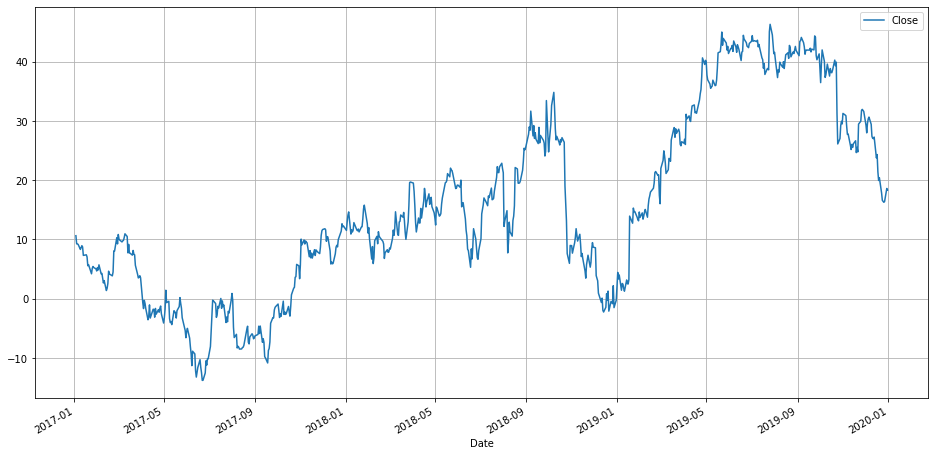

In [29]:
res = Y_pred - Y_test
res.plot(figsize = (16,8), grid = True)

In [30]:
#reg.summary()
print(reg)

LinearRegression()


In [ ]:
#Visualize the entire data

plt.figure(figsize=(16,8))
plt.title('Model = Reg', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(X_train['Close'])
plt.plot([['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predicted'], loc='lower right')
plt.grid()
plt.show()

In [ ]:
#Visualize the entire data

plt.figure(figsize=(16,8))
plt.title('Model = LSTM', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(trn['Close'])
plt.plot(tst[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predicted'], loc='lower right')
plt.grid()
plt.show()

In [ ]:
#Visualize the test data

plt.figure(figsize=(16,8))
plt.title('Actual vs Predicted', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(tst[['Close', 'Predictions']])
plt.legend(['Actual', 'Predicted'], loc='lower right')
plt.grid()
plt.show()

train = pd.read_csv("train.csv", header = None)
test = pd.read_csv("test.csv", header = None)

X = train.drop([500],axis=1) #Predictor Variables(independant variable)
y = train[500].copy() #Target Variable (depdependant variable)

model = LinearRegression().fit(X,y)
pd.DataFrame(model.predict(test)).to_csv("Predictions.csv", index = False, header = False)

## Visualizing the Data

In [ ]:
df.plot(figsize=(16,8), title = "Tesla stock price for 2010 to 2019", grid = True)

## Calculations

#### Looks like EMA_3 has the best predictive power overall since it has the lowest RMSE value

In [ ]:
#Evaluating Model Performance

import math
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error


y_test = df[1640:]['Close']
predictions = df[1640:]['EMA_0.3']
print('Mean Square Error (MSE): '+str(mean_squared_error(predictions, y_test)))
print('Mean Absolute Error(MAE): '+str(mean_absolute_error(predictions, y_test)))
print('Root Mean Square Error (RMSE): '+str(math.sqrt(mean_squared_error(predictions, y_test))))

Credit: https://towardsdatascience.com/moving-averages-in-python-16170e20f6c